# Taller 3 Regresión y Clustering

Este taller es para realizar problemas de Regression y Clasificación 

## Punto 1. Defina un Dataset

Encuentre dos data set a utilizar:
+ Uno para un problema de clasificación
+ Uno para un problema de regression

__Recomendación:__ Utilize los dataset disponisble en la librería scikit-learn http://scikit-learn.org/stable/datasets/

Cada uno escoja un par de dataset diferentes.

In [1]:
from sklearn import datasets
import pandas as pd

In [2]:
from sklearn.datasets import load_digits  
digits = load_digits() #dataset de clasificacion
brio= pd.read_csv('C:/Users/Alex/Documents/eafit/semestres/X semestre/programacion/briofitos.csv') #dataset regresion

In [3]:
#digits.DESCR
digits.target

array([0, 1, 2, ..., 8, 9, 8])

Brio es un dataframe que entrega informacion de numero promedio y numero total de especies de briofitos que se encuentran a lo largo de un gradiente altitudinal en una montana

In [4]:
brio.head()

,altura_media,Suma_briofitos,Promedio_briofitos
0,600,32,4
1,800,24,8
2,1000,90,8
3,1200,117,12
4,1400,85,17


## Punto 2.1. Regression

Realice una regresión lineal del dataset elegido.

In [5]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


In [6]:
brio2=pd.DataFrame({'x':brio['altura_media'],'y':brio['Promedio_briofitos']})


In [65]:
npMatrix = np.matrix(brio2)
X, Y = npMatrix[:,0], npMatrix[:,1]
#mdl = LinearRegression().fit(X,Y)
mdl = LinearRegression().fit(brio2[['x']],brio2.y)
m = mdl.coef_[0]
b = mdl.intercept_
print ("formula: y = {0}x + {1}".format(m, b) )# following slope intercept form

formula: y = 0.000698529411764706x + 10.051470588235293


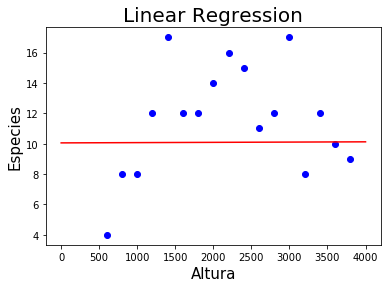

In [66]:
plt.scatter(X,Y, color='blue')
plt.plot([0,4000],[b,m*100+b],'r')
plt.title('Linear Regression', fontsize = 20)
plt.xlabel('Altura', fontsize = 15)
plt.ylabel('Especies', fontsize = 15)
plt.show()

## Punto 2.2. Evalúe la calidad de la regressión

Obtenga una medida de la calidad de la regressión (e.g. R2)

In [67]:
from sklearn.metrics import r2_score
print('Coefficients: \n', mdl.coef_)
print('Variance score: %.2f' % mdl.score(X, Y))
y1=mdl.predict(Y)
print ( 'R2 score:', r2_score(Y, y1))

Coefficients: 
 [ 0.00069853]
Variance score: 0.04
R2 score: -0.195153028574


## Punto 3.1. Realize una clasificación

Realice una clasificación utilizando una regresión logística

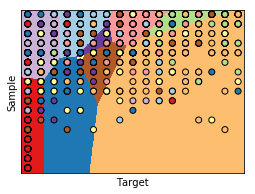

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

X = digits.data[:, 2:4]  
Y = digits.target

h = .02  
logreg = linear_model.LogisticRegression(C=1e5)

logreg.fit(X, Y)


x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Target')
plt.ylabel('Sample')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Punto 3.2. Evalúe la clasificación

Obtenga al menos dos medidas del desempeño de la clasificación (e.g. accuracy, recall) 

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier

In [27]:
X, y = digits.data[:1700,:], digits.target[:1700]
tX, ty = digits.data[1700:,:], digits.target[1700:]
OVR = OneVsRestClassifier(linear_model.LogisticRegression(C=1e5)).fit(X,y)
OVO = OneVsOneClassifier(linear_model.LogisticRegression(C=1e5)).fit(X,y)
print ('One vs rest accuracy: %.3f' % OVR.score(tX,ty))
print ('One vs one accuracy: %.3f' % OVO.score(tX,ty))

One vs rest accuracy: 0.938
One vs one accuracy: 0.969


In [13]:
from sklearn import metrics
print (metrics.classification_report(tX[:, 1],ty))


             precision    recall  f1-score   support

        0.0       1.00      0.11      0.19        85
        1.0       0.00      0.00      0.00         5
        2.0       0.20      0.67      0.31         3
        3.0       0.00      0.00      0.00         1
        4.0       0.00      0.00      0.00         2
        5.0       0.00      0.00      0.00         1
        6.0       0.00      0.00      0.00         0
        7.0       0.00      0.00      0.00         0
        8.0       0.00      0.00      0.00         0
        9.0       0.00      0.00      0.00         0

avg / total       0.88      0.11      0.18        97



C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Punto 4. Otros algoritmos

Elija otros algoritmos (cada uno algoritmos diferentes), repita los ejercicios 2 y 3 con los algoritmos elegidos y compare el desempeño entre las regresiones lineal (para regresión) y logística (para clasificación).

http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

In [57]:
from sklearn import svm
X = brio[['Suma_briofitos','altura_media']]
y = brio['Promedio_briofitos']
clf = svm.SVC()
clf.fit(X, y)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Automatically created module for IPython interactive environment


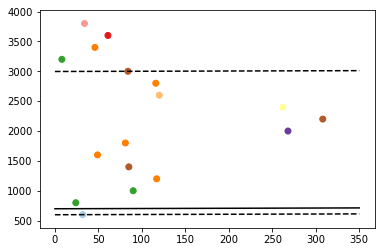

In [51]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



clf = svm.SVC(kernel='linear')
clf.fit(X, y)


w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(0, 350)
yy = a * xx - (clf.intercept_[0]) / w[1]

b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])


plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=plt.cm.Paired)

plt.axis('tight')
plt.show()

In [62]:
clf = svm.SVC(kernel='linear').fit(X, y)
y1=clf.predict(X)
print ( 'R2 score:', r2_score(y, y1))

R2 score: 0.594295692666


Se usaron los datos sobre briofitos para realizar un regresion lineal clasica y una lineal con SVM, el mejor resultado obtenido fue el utilizado con SVM, teniendo un R2 de 0.59. El R2 obtenido con la regresion linela clasica, el cual fue negativo.

C:\Users\Alex\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.279910962716
0.386755703951
0.118530884808


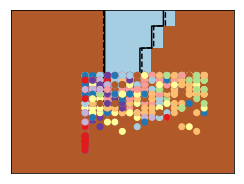

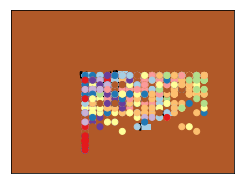

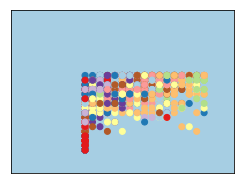

In [34]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm


# Our dataset and targets

X = np.c_[digits.data[:, 2:4]]
Y = np.c_[digits.target]

# figure number
fignum = 1

# fit the model
for kernel in ('linear', 'rbf','sigmoid'):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)
    print (clf.score(X,Y))

   
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=80,
                facecolors='none', zorder=10)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)

    plt.axis('tight')
    x_min = -10
    x_max = 20
    y_min = -5
    y_max = 30

    XX, YY = np.mgrid[x_min:x_max:20j, y_min:y_max:400j]
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()])
    
    
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-.5, 0, .5])

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()

Se uso el dataset de digits para hacer clasificaciones por medio del metodo logistico y del SVM. Se logro determinar que para este set de datos, el mejor Score lo proporciona el modelo logistico. Para este se calcularon dos metodos, siendo ambos muy cercanos a 1. Por otro lado, se realizaron utilizaron 3 Kernel diferentes para el SMV (linear, rbf y sigmoid), donde el score mas alto fue el del kernel rbf con 0.38, las demas clasifiaciones estuvieron por debajo de 0.3

# Taller 4

Exponer los algorithmos elegidos en el Punto 4 del Taller 3